In [2]:
from pylab import *
from casadi import *
import time
# Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
normalization = 1e9
δ  = 0.02
α  = 0.045007414
κ  = 2.094215255
pf = 20.76
ζ  = 1.66e-4 * normalization 
p2 =  44.75
ξ = 20

In [4]:
#Site Data
df = pd.read_csv("data/calibration_25SitesModel.csv")
z̄ = (df['zbar_2017_25Sites'].to_numpy() )/normalization
n = len(z̄)

γ1_list  = df['gamma_25Sites'].to_numpy() -  df['gammaSD_25Sites'].to_numpy() 
γ2_list  = df['gamma_25Sites'].to_numpy() +  df['gammaSD_25Sites'].to_numpy() 
σ_list = df['gammaSD_25Sites'].to_numpy() *np.ones((1,n))
cov_list = σ_list * np.identity(n) *σ_list
mean = γ1_list/2 + γ2_list/2

z0_list = df['z_2017_25Sites'].to_numpy()
γ_post_list = ((γ1_list/2 + γ2_list/2)*np.ones((1,n))).T

θ_list  = df['theta_25Sites'].to_numpy()
Z0_list = z0_list/ normalization


γ_list_mean_posterior = ((γ1_list/2 + γ2_list/2)*np.ones((1,n))).T
γ_post_list_old = γ_post_list

In [4]:

def normal(z, μ, Σ):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """


    N = n

    temp2 = -.5 * (z - μ).T @ np.linalg.inv(Σ) @ (z - μ)

    return  temp2

In [5]:
simulation = 100_000
γ_vec  = np.zeros((n,simulation+1))
γ_vec[:,0]= ((γ1_list/2 + γ2_list/2)).T

In [6]:
error = 1e9
tol = 0.01

In [7]:
leng=200
arr = np.cumsum(
                   np.triu(
                     np.ones((leng, leng))
                   ), axis=1)

Bdym=(1-α)**(arr-1)
Bdym[Bdym>1] = 0 
Bdym = Bdym.T

Adym = (np.linspace(1,200,200)*np.ones((1,200))).T

# Explaining the Code


1. Optimization Phase: For a given $\tilde \gamma$ we solve the problem, using some sort of optimization algorithm (IPOPT in our case),  

\begin{equation}
      \left\{ \int_0^\infty \exp(-\delta t) \left[-P^e  \left (\kappa\sum_{i=1}^I Z^i_t- \sum_{i=1}^I \dot X^i_t \right)+  P^a_t  \sum_i \theta^i Z^i_t-\frac \zeta 2 \left (\sum_i U_t^i + V_t^i \right)^2 \right ] dt\right\} 
\end{equation}

\begin{equation} \label{eq:z}
\dot Z_t^i = U_t^i - V_t^i . 
\end{equation}

\begin{equation} \label{eq:x}
{\dot X}_t^i  = - \tilde \gamma^i U^i_t - \alpha \left[ X_t^i - \tilde \gamma^i  \left( {{\bar z}^i - Z_t^i }  \right) \right] 
\end{equation}

$$
X_0^i = \tilde \gamma^i * C
$$

where $C$ is some constant. 

2. MC phase: The algorithm for this part is the standard Metropolis-Hastings Algorirthm. The only thing that is a bit troublesome to deal with is the formulation of our likelihood which is $g$. 

    1. We are given $\gamma^*$ via the MHMC algorithm. 
    2. Use $U_t^i$ and $V_t^i$ to evaluate the objective function under $\gamma^*$. 
    3. Form the Likelihood $g$

\begin{equation}\label{min_solution}
g^* = \exp\left[ - {\frac 1 \xi } \left\{ \int_0^\infty \exp(-\delta t) \left[-P^e  \left (\kappa\sum_{i=1}^I Z^i_t- \sum_{i=1}^I \dot X^i_t \right)+  P^a_t  \sum_i \theta^i Z^i_t-\frac \zeta 2 \left (\sum_i U_t^i + V_t^i \right)^2 \right ] dt\right\} \right]
\end{equation} 
    
    



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

prepare simulations
Simulation 0
Execution time: 0.1313920021057129 seconds
Simulation 10000
Execution time: 77.58489298820496 seconds
Simulation 20000
Execution time: 98.20730209350586 seconds
Simulation 30000
Execution time: 75.13554668426514 seconds
Simulation 40000
Execution time: 75.21353602409363 seconds
Simulation 50000
Execution time: 80.396901845932 seconds
Simulation 60000
Execution time: 87.33655095100403 seconds
Simulation 70000
Execution time: 75.19947528839111 seconds
Simulation 80000
Execution time: 74.55376696586609 seconds
Simulation 90000
Execution time: 76.63753890991211 seconds
0.098822

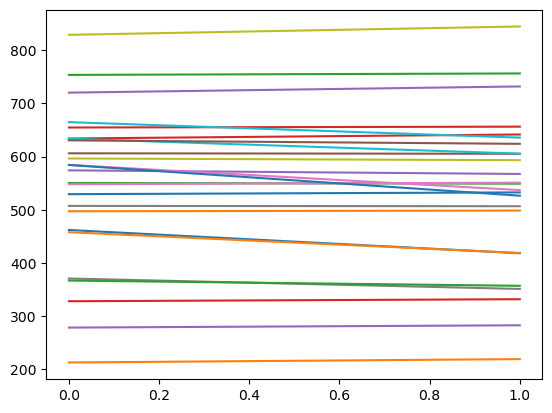

prepare simulations
Simulation 0
Execution time: 0.1328437328338623 seconds
Simulation 10000
Execution time: 74.46914625167847 seconds
Simulation 20000
Execution time: 81.08626627922058 seconds
Simulation 30000
Execution time: 91.33202576637268 seconds
Simulation 40000
Execution time: 75.83653020858765 seconds
Simulation 50000
Execution time: 78.1695659160614 seconds
Simulation 60000
Execution time: 95.44023513793945 seconds
Simulation 70000
Execution time: 97.23959803581238 seconds
Simulation 80000
Execution time: 96.53159809112549 seconds
Simulation 90000
Execution time: 107.04267311096191 seconds
0.08307365237024349


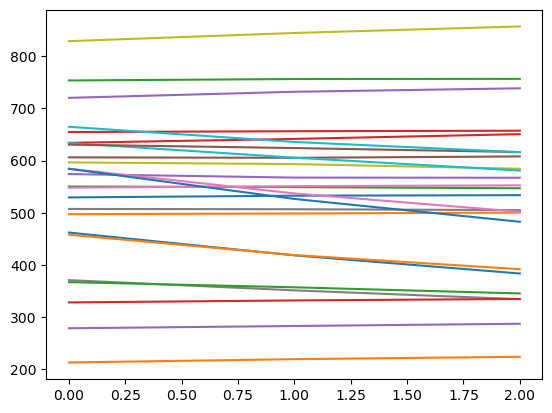

prepare simulations
Simulation 0
Execution time: 0.17388582229614258 seconds
Simulation 10000
Execution time: 99.2846736907959 seconds
Simulation 20000
Execution time: 115.45412707328796 seconds
Simulation 30000
Execution time: 88.7791862487793 seconds
Simulation 40000
Execution time: 92.60830998420715 seconds
Simulation 50000
Execution time: 94.59308290481567 seconds
Simulation 60000
Execution time: 101.77147698402405 seconds
Simulation 70000
Execution time: 90.36029601097107 seconds
Simulation 80000
Execution time: 87.82989501953125 seconds
Simulation 90000
Execution time: 80.10828685760498 seconds
0.06467929610117407


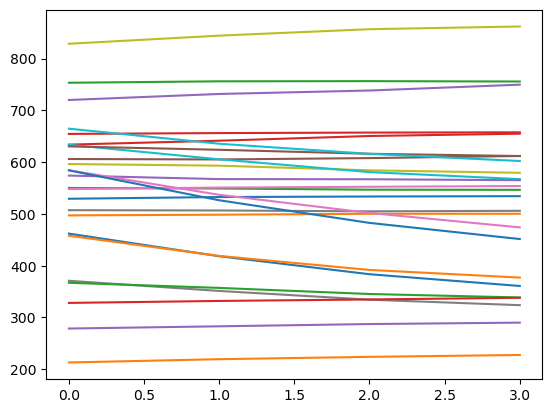

prepare simulations
Simulation 0
Execution time: 0.14021992683410645 seconds
Simulation 10000
Execution time: 81.06251335144043 seconds
Simulation 20000
Execution time: 85.45967507362366 seconds
Simulation 30000
Execution time: 121.32214403152466 seconds
Simulation 40000
Execution time: 151.0640230178833 seconds
Simulation 50000
Execution time: 153.74249601364136 seconds
Simulation 60000
Execution time: 119.21920895576477 seconds
Simulation 70000
Execution time: 122.00379800796509 seconds
Simulation 80000
Execution time: 94.38984704017639 seconds
Simulation 90000
Execution time: 99.18446373939514 seconds
0.04820048631005031


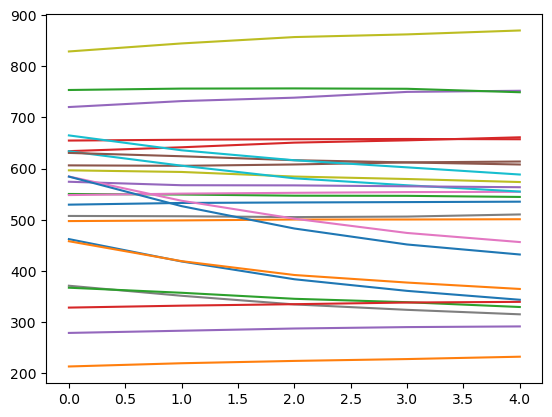

prepare simulations
Simulation 0
Execution time: 0.1671140193939209 seconds
Simulation 10000
Execution time: 94.66574382781982 seconds
Simulation 20000
Execution time: 92.13946509361267 seconds
Simulation 30000
Execution time: 90.62975788116455 seconds
Simulation 40000
Execution time: 97.48350715637207 seconds
Simulation 50000
Execution time: 118.71143984794617 seconds
Simulation 60000
Execution time: 94.61640095710754 seconds
Simulation 70000
Execution time: 104.53699517250061 seconds
Simulation 80000
Execution time: 118.315847158432 seconds
Simulation 90000
Execution time: 125.28547692298889 seconds
0.041003710952107274


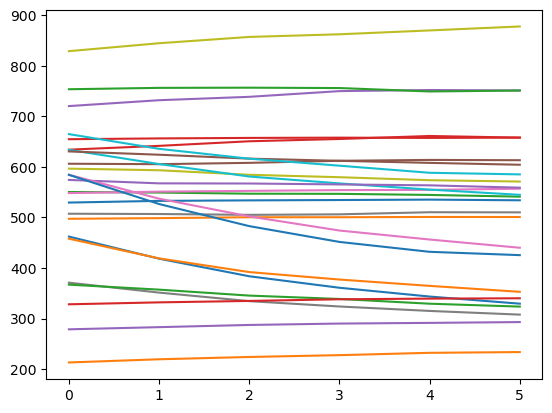

prepare simulations
Simulation 0
Execution time: 0.2595641613006592 seconds
Simulation 10000
Execution time: 93.20691204071045 seconds
Simulation 20000
Execution time: 101.72748684883118 seconds
Simulation 30000
Execution time: 90.19447875022888 seconds
Simulation 40000
Execution time: 88.77650189399719 seconds
Simulation 50000
Execution time: 84.29736804962158 seconds
Simulation 60000
Execution time: 93.14716219902039 seconds
Simulation 70000
Execution time: 110.64188432693481 seconds
Simulation 80000
Execution time: 117.05601000785828 seconds
Simulation 90000
Execution time: 93.35877704620361 seconds
0.03637658810808511


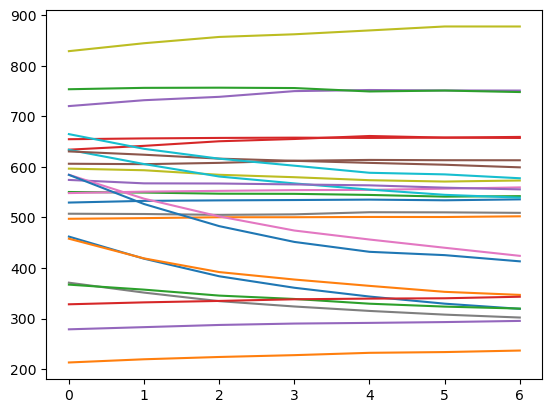

prepare simulations
Simulation 0
Execution time: 0.20531296730041504 seconds
Simulation 10000
Execution time: 101.67371392250061 seconds
Simulation 20000
Execution time: 108.17109417915344 seconds
Simulation 30000
Execution time: 105.10810399055481 seconds
Simulation 40000
Execution time: 92.22791194915771 seconds
Simulation 50000
Execution time: 94.23870801925659 seconds
Simulation 60000
Execution time: 96.99942398071289 seconds
Simulation 70000
Execution time: 87.73634791374207 seconds
Simulation 80000
Execution time: 93.23379516601562 seconds
Simulation 90000
Execution time: 90.09450817108154 seconds
0.027592330590703956


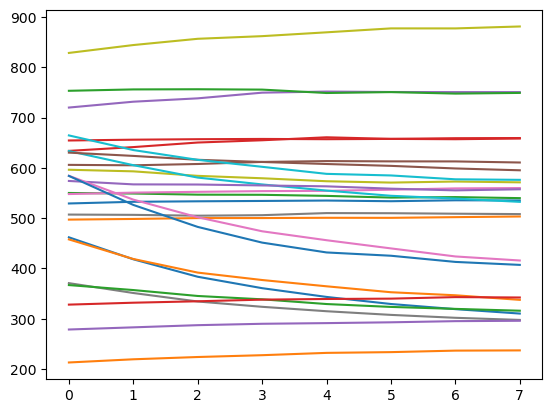

prepare simulations
Simulation 0
Execution time: 0.16092324256896973 seconds
Simulation 10000
Execution time: 93.44456100463867 seconds
Simulation 20000
Execution time: 84.91356110572815 seconds
Simulation 30000
Execution time: 92.12726211547852 seconds
Simulation 40000
Execution time: 89.41594815254211 seconds
Simulation 50000
Execution time: 214.54497480392456 seconds
Simulation 60000
Execution time: 73.6723370552063 seconds
Simulation 70000
Execution time: 80.31525087356567 seconds
Simulation 80000
Execution time: 75.60026121139526 seconds
Simulation 90000
Execution time: 82.07509922981262 seconds
0.021348180327326913


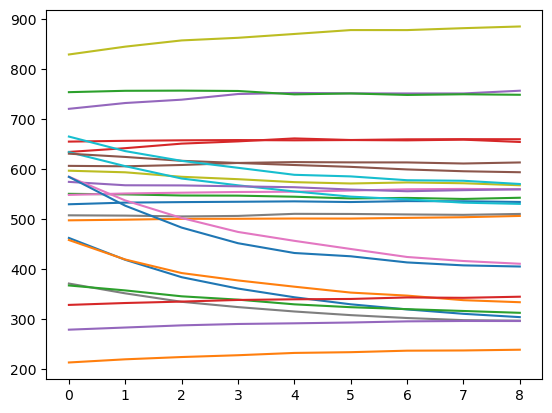

prepare simulations
Simulation 0
Execution time: 0.15093708038330078 seconds
Simulation 10000
Execution time: 81.75672793388367 seconds
Simulation 20000
Execution time: 92.79337978363037 seconds
Simulation 30000
Execution time: 96.07951593399048 seconds
Simulation 40000
Execution time: 107.05263614654541 seconds
Simulation 50000
Execution time: 88.52084422111511 seconds
Simulation 60000
Execution time: 100.18833589553833 seconds
Simulation 70000
Execution time: 134.57015109062195 seconds
Simulation 80000
Execution time: 114.36569881439209 seconds
Simulation 90000
Execution time: 123.42127585411072 seconds
0.015314093303542903


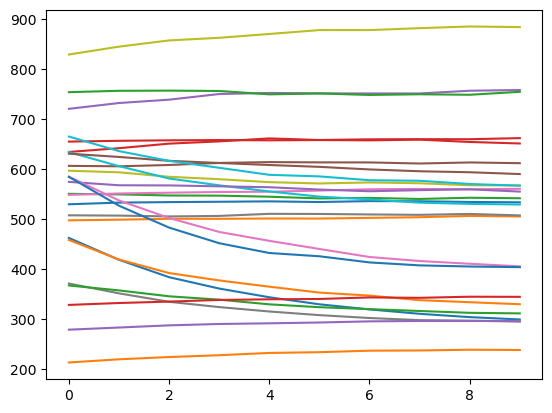

prepare simulations
Simulation 0
Execution time: 0.23726797103881836 seconds
Simulation 10000
Execution time: 129.50691676139832 seconds
Simulation 20000
Execution time: 107.95187091827393 seconds
Simulation 30000
Execution time: 101.70182585716248 seconds
Simulation 40000
Execution time: 100.02467584609985 seconds
Simulation 50000
Execution time: 97.48325514793396 seconds
Simulation 60000
Execution time: 111.50041508674622 seconds
Simulation 70000
Execution time: 105.58100295066833 seconds
Simulation 80000
Execution time: 128.51163411140442 seconds
Simulation 90000
Execution time: 126.87486410140991 seconds
0.02036859174892752


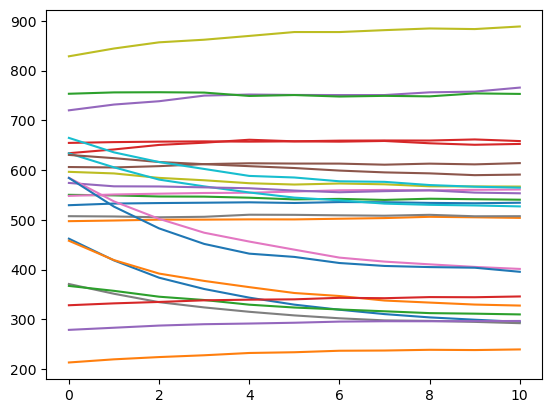

prepare simulations
Simulation 0
Execution time: 0.1785879135131836 seconds
Simulation 10000
Execution time: 118.76632976531982 seconds
Simulation 20000
Execution time: 136.82234597206116 seconds
Simulation 30000
Execution time: 120.022784948349 seconds
Simulation 40000
Execution time: 128.73426818847656 seconds
Simulation 50000
Execution time: 116.85314393043518 seconds
Simulation 60000
Execution time: 117.77373313903809 seconds
Simulation 70000
Execution time: 174.43883419036865 seconds
Simulation 80000
Execution time: 142.7451469898224 seconds
Simulation 90000
Execution time: 143.92668271064758 seconds
0.013067438150423483


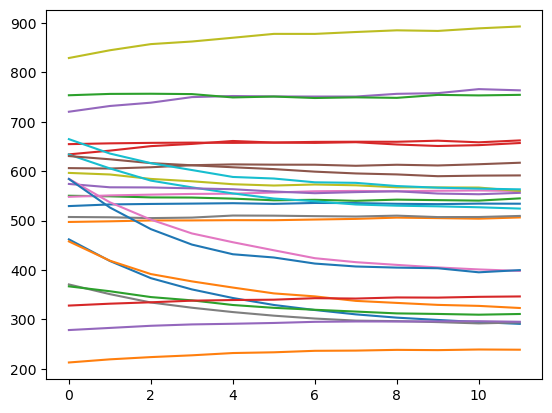

prepare simulations
Simulation 0
Execution time: 0.17679691314697266 seconds
Simulation 10000
Execution time: 123.90962290763855 seconds
Simulation 20000
Execution time: 127.92304515838623 seconds
Simulation 30000
Execution time: 118.56093692779541 seconds
Simulation 40000
Execution time: 112.85142612457275 seconds
Simulation 50000
Execution time: 109.64782905578613 seconds
Simulation 60000
Execution time: 112.0533230304718 seconds
Simulation 70000
Execution time: 112.25298190116882 seconds
Simulation 80000
Execution time: 109.97385501861572 seconds
Simulation 90000
Execution time: 108.41524004936218 seconds
0.008969560897005194


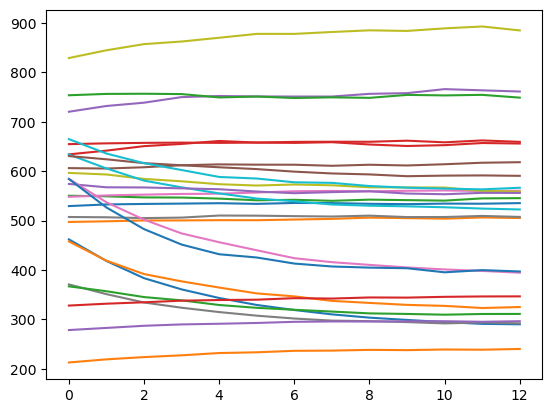

In [8]:
era = 0
while error > tol: 
    
    x0_list = γ_post_list.T * df['forestArea_2017_ha_25Sites'].to_numpy()
    X0_list = x0_list/ normalization
    #Construct Matrix A
    Az = np.zeros((n, n+2))
    Ax = np.zeros((1, n+2))

    Ax[0:1,0:n-0] = -α *γ_post_list[0:n].T
    Ax[0, -1] = np.sum(α*γ_post_list.T * z̄)
    Ax[0,-2]  = -α

    A  = np.concatenate((Az, Ax, np.zeros((1, n+2))), axis=0)
    
    # Construct Matrix B
    Bz = np.identity((n))
    Bx = (np.zeros((1,n)))
    B  = np.concatenate((Bz, Bx,  np.zeros((1, n))), axis=0)
    
    # Construct Matrix B
    Dz =   np.zeros((n,n))
    Dx = -(np.ones((1,n))*γ_post_list[0:n].T)

    D  = np.concatenate((Dz, Dx, np.zeros((1, n))), axis=0)
    
    T   = 200
    N   = T

    dt = T/N
    Y = MX.sym('Y'  ,n + 2) 
    up = MX.sym('up',n) 
    um = MX.sym('um',n) 

    rhs = (sparsify(A)@Y + sparsify(B)@(up-um) + sparsify(D)@(up))*dt + Y
    f = Function('f', [Y, um, up],[rhs])

    import math
    ds_vect = np.zeros((N+1,1))
    for i in range(N+1):
        ds_vect[i]=math.exp(-δ*i*dt)   
        
    opti = casadi.Opti()

    # Decision variables for states

    X = opti.variable(n+2 ,N+1)
    # Aliases for states

    Up = opti.variable(n,N)
    Um = opti.variable(n,N)
    Ua = opti.variable(1,N)
    
    # 1.2: Parameter for initial state
    ic = opti.parameter(n+2-0)

    # Gap-closing shooting constraints
    for k in range(N):
        opti.subject_to(X[:,k+1]==f(X[:,k],Um[:,k], Up[:,k]))

    # Initial and terminal constraints
    opti.subject_to(X[:,0] == ic)
    opti.subject_to(opti.bounded(0,X[0:n,:],z̄[0:n]))
    # Objective: regularization of controls
    # 1.1: added regularization
    for k in range(n-0):
        opti.subject_to(opti.bounded(0,Um[k,:],inf))
        opti.subject_to(opti.bounded(0,Up[k,:],inf))

    opti.subject_to(Ua == sum1(Up+Um)**2 )

    opti.minimize( sum2(ds_vect[0:N,:].T*(Ua* ζ/2 ))
                  - sum2(ds_vect[0:N,:].T*(pf*X[-2,1:] - pf*X[-2,0:-1]  ))
                  - sum2(ds_vect.T*sum1((p2*θ_list - pf*κ )*X[0:n-0,:] )))

    # solve optimization problem 
    options = dict()
    options["print_time"] = False
    options["expand"]     = True
    options["ipopt"]      = {
                        'print_level': 0,
                        'fast_step_computation':            'yes',
                        'mu_allow_fast_monotone_decrease':  'yes',
                        'warm_start_init_point':            'yes',
                            }
    opti.solver('ipopt',options)

    t1 = time.time()
    opti.set_value(ic,vertcat(Z0_list,np.sum(X0_list),1))
    sol = opti.solve()
    
    
    trace = {"γ":np.zeros((simulation,n))}
    
    objective_value = -(sum2(ds_vect[0:T,:].T*(sol.value(Ua)* ζ/2 ))
                      - sum2(ds_vect[0:T,:].T*(pf*sol.value(X)[-2,1:] 
                                               - pf*sol.value(X)[-2,0:-1]  ))
                      - sum2(ds_vect.T*((p2*θ_list - pf*κ )@sol.value(X)[0:n,:])))
    fγ̄ =    -.5 * (γ_post_list - γ_list_mean_posterior.flatten()).T @ np.linalg.inv(cov_list) @ (γ_post_list - γ_list_mean_posterior.flatten())
    N_star_old = -1/ξ * objective_value  + fγ̄ 
    
    print('prepare simulations')
    st = time.time()
    innov = stats.multivariate_normal(np.zeros_like(mean), cov_list).rvs(size=simulation)
    u = stats.uniform(0, 1).rvs(simulation)
    for episode in range(simulation):
        γ_list_prime = (γ_post_list.flatten() + innov[episode,:])
        while np.sum(γ_list_prime <0)>0 :
            innov_temp = stats.multivariate_normal(np.zeros_like(mean), cov_list).rvs(size=1)
            γ_list_prime = (γ_post_list.flatten() + innov_temp)
            
        x0_list = γ_list_prime * df['forestArea_2017_ha_25Sites'].to_numpy()
        X0_list = x0_list/ normalization
        
        z̄_comp = z̄ * np.ones((1,n))
        
        X_dym_list = np.zeros((1,T+1))
        X_zero_list = np.sum(X0_list)*np.ones((200,1))
        X_dym_list[:,0] = np.sum(X0_list)
        ω =   (γ_list_prime.T@(α*z̄_comp.T- α*sol.value(X)[0:n,:-1]) -γ_list_prime.T@sol.value(Up))
        X_dym_list[:,1:] =( (((1-α)**Adym.flatten()))*X_zero_list.flatten()  +(Bdym@ω.T).flatten() )
        objective_value = -(sum2(ds_vect[0:T,:].T*(sol.value(Ua)* ζ/2 ))
                      - sum2(ds_vect[0:T,:].T*(pf*X_dym_list[:,1:] 
                                               - pf*X_dym_list[:,0:-1]  ))
                      - sum2(ds_vect.T*((p2*θ_list - pf*κ )@sol.value(X)[0:n,:] )))
        
        fγ̄ =    -.5 * (γ_list_prime - γ_list_mean_posterior.flatten()).T @ np.linalg.inv(cov_list) @ (γ_list_prime - γ_list_mean_posterior.flatten())
        N_star = -1/ξ * objective_value    + fγ̄
        RC_pre = np.array(N_star-N_star_old)
        RC = np.nanmin(np.array([0, RC_pre[0,0]]))
        if np.log(u[episode]) < RC : 
            N_star_old = N_star
            γ_post_list = γ_list_prime
        if episode % 10000 == 0:
            et = time.time()
            print(f'Simulation {episode}')
            elapsed_time = et - st
            print('Execution time:', elapsed_time, 'seconds')
            st = time.time()

        trace["γ"][episode] = γ_post_list.flatten()
    γ_post_list = (np.sum(trace["γ"], axis=0 )/simulation *np.ones((1,n))).T/4 + γ_post_list_old*3/4
    error =np.max(abs(γ_post_list_old-γ_post_list)/γ_post_list_old)
    print(error)
    γ_post_list_old = γ_post_list
    γ_vec[:, era+1:era+2] = γ_post_list
    Posterior = trace["γ"]
    plt.plot(γ_vec[:,:era+2].T)
    plt.show()

    era = era+1

In [9]:
np.save(f'pf_{pf}ξ_{ξ}_Posterior_25', Posterior)

In [10]:
mc = simulation*10

In [11]:
    γ_list_mc = stats.multivariate_normal(mean, cov_list).rvs(size=mc)
    γ_list_mc = γ_list_mc[(γ_list_mc >= 0).all(axis=1)]
    while np.shape(γ_list_mc)[0] < mc:
        γ_list_mc_temp = stats.multivariate_normal(mean, cov_list).rvs(size = mc - np.shape(γ_list_mc)[0])
        if np.size(γ_list_mc_temp)> n:
            γ_list_mc_temp = γ_list_mc_temp[(γ_list_mc_temp >= 0).all(axis=1)]
        else:
            γ_list_mc_temp = (γ_list_mc_temp*np.ones((1,n)))
        γ_list_mc = np.concatenate((γ_list_mc, γ_list_mc_temp), axis=0)

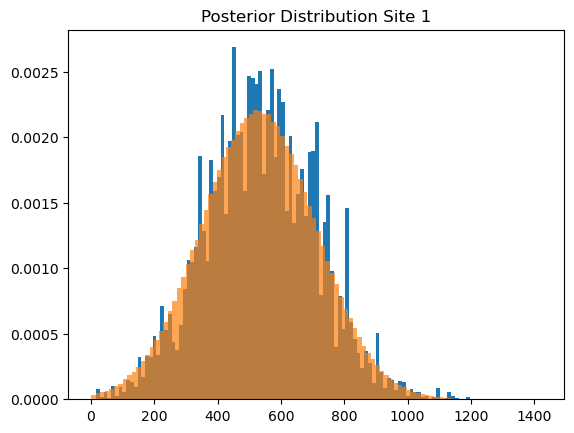

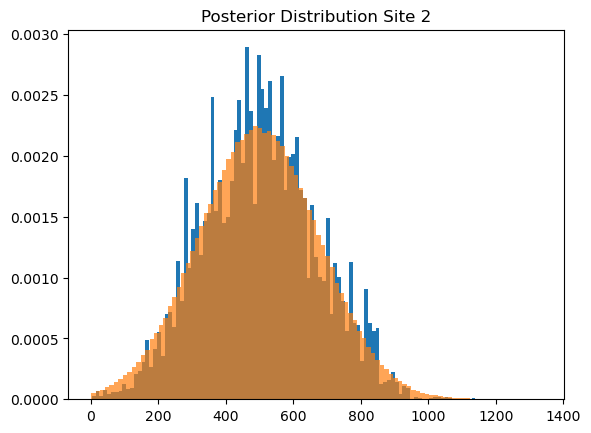

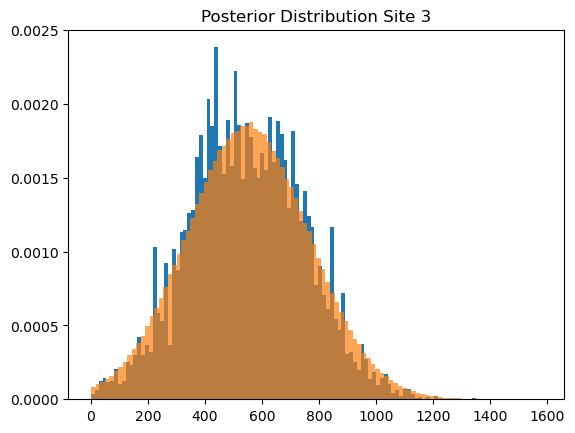

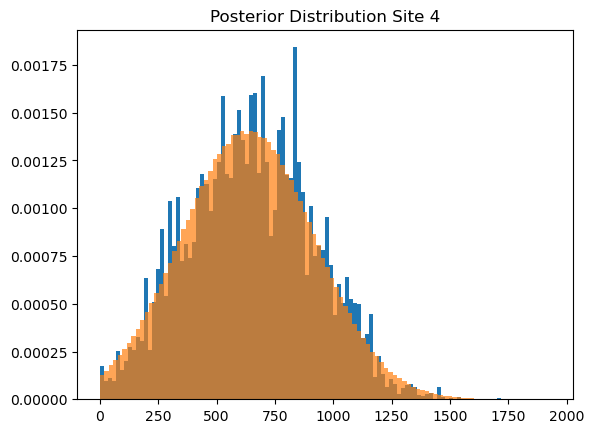

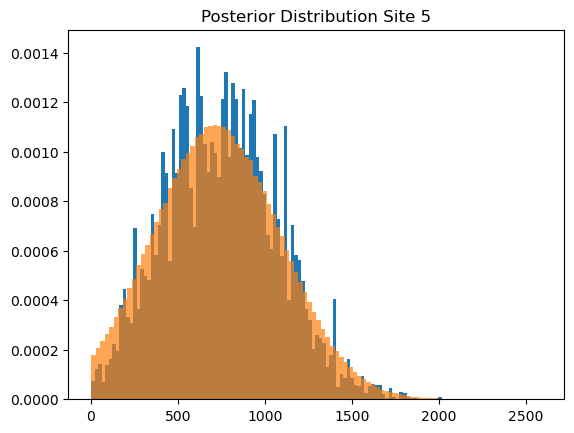

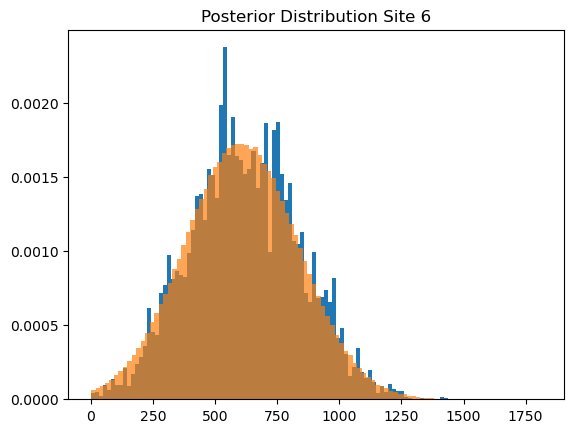

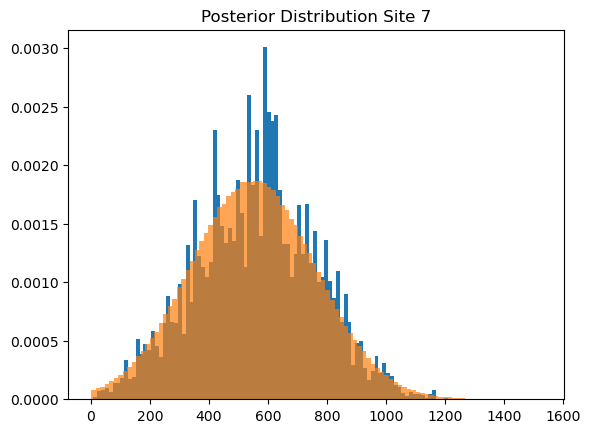

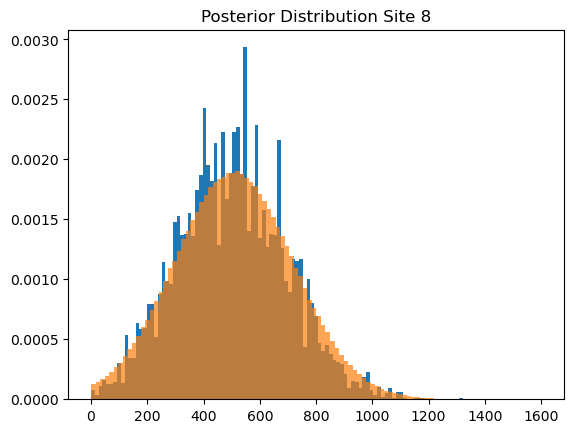

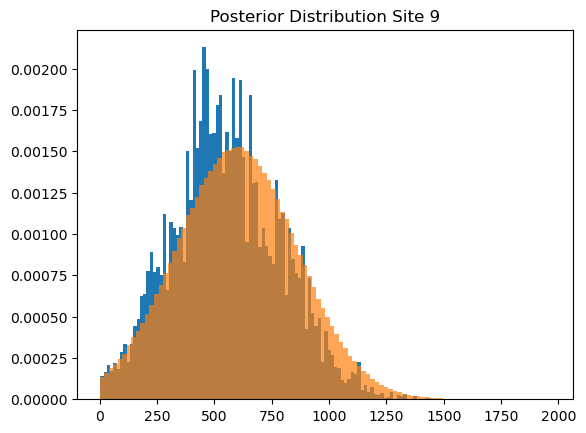

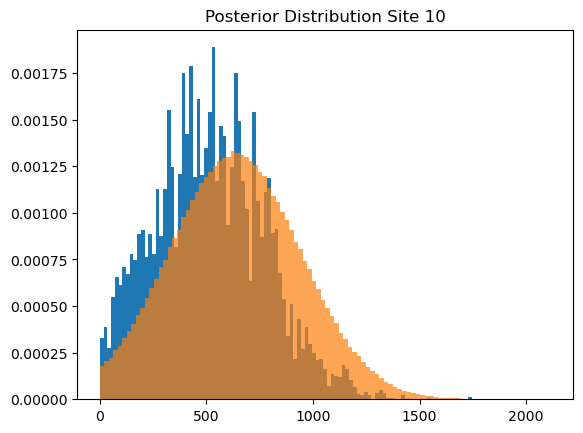

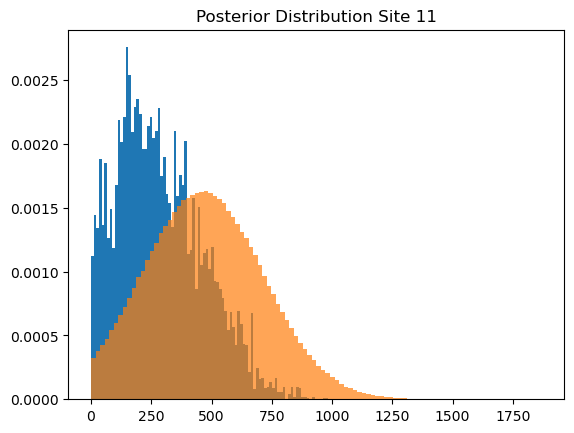

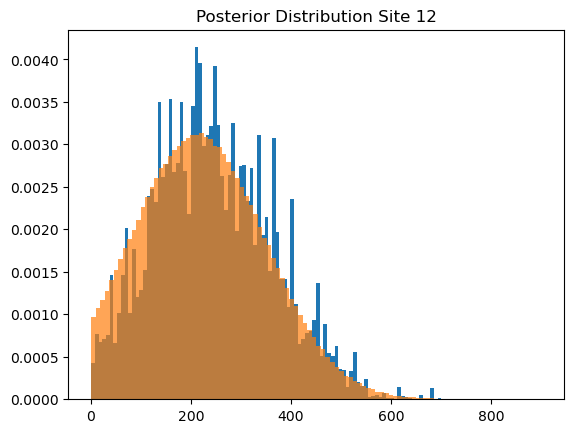

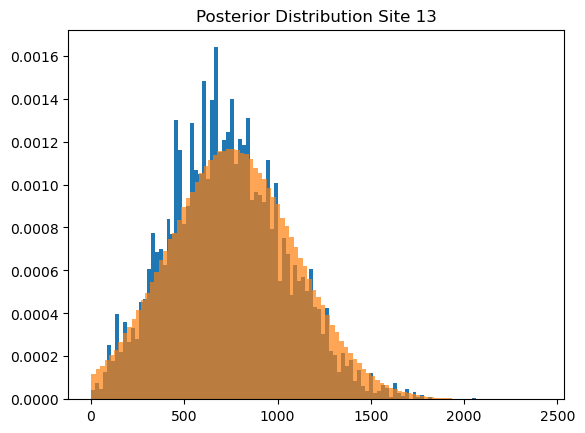

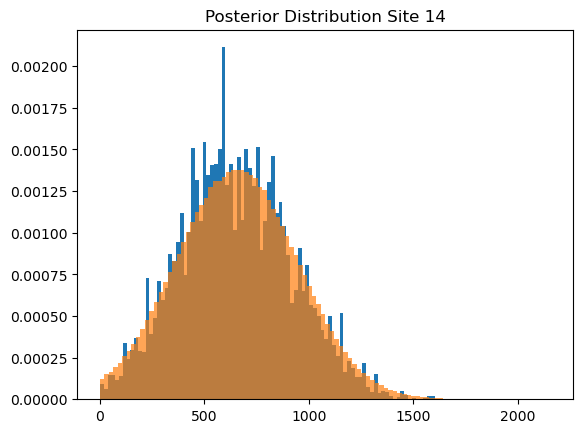

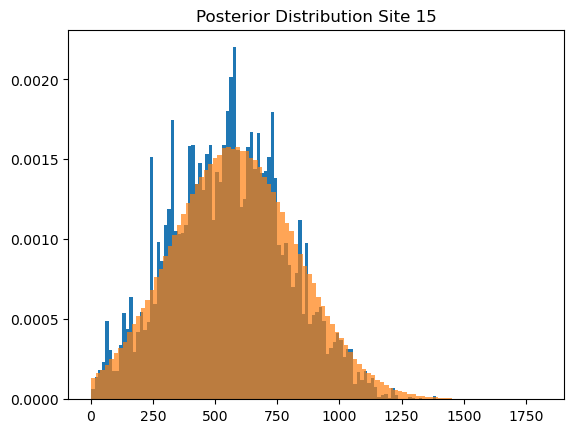

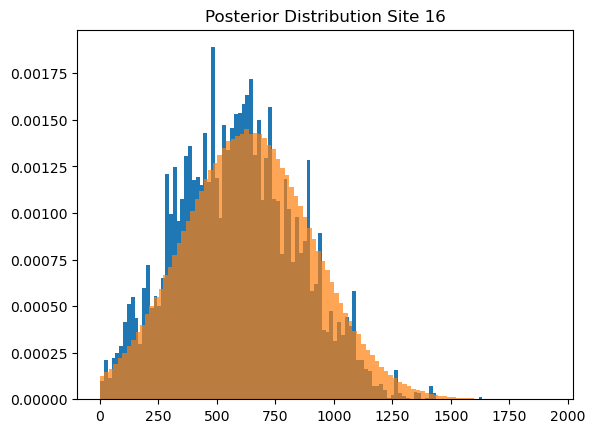

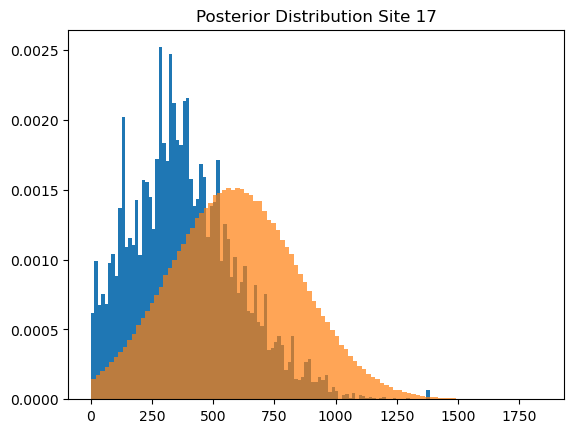

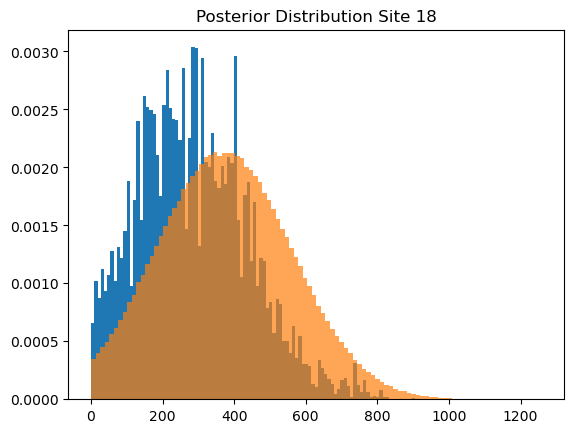

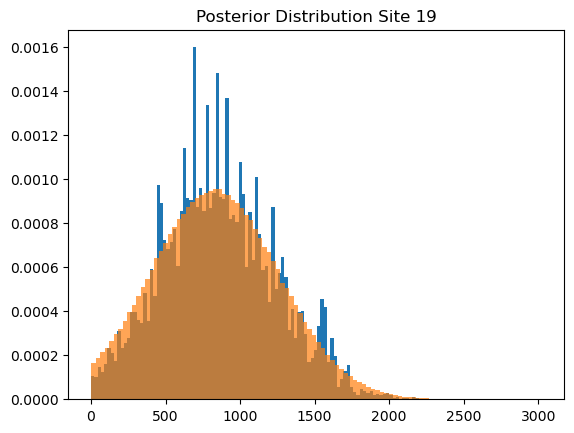

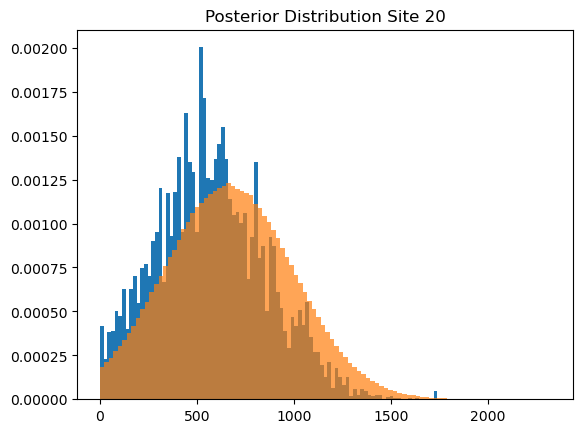

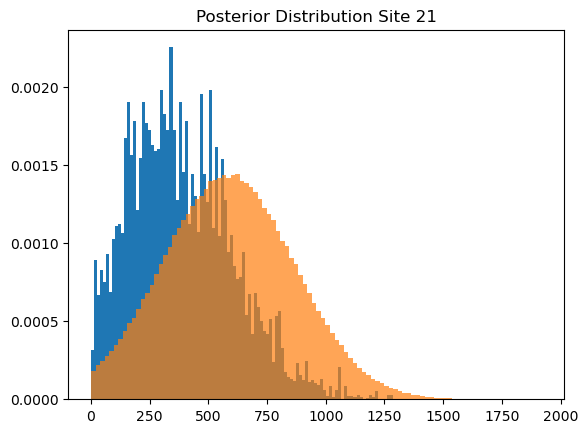

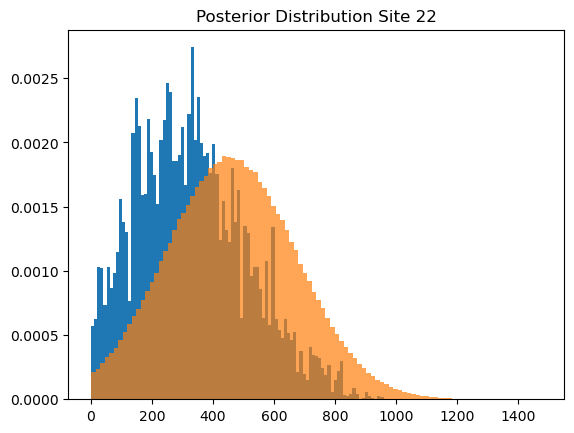

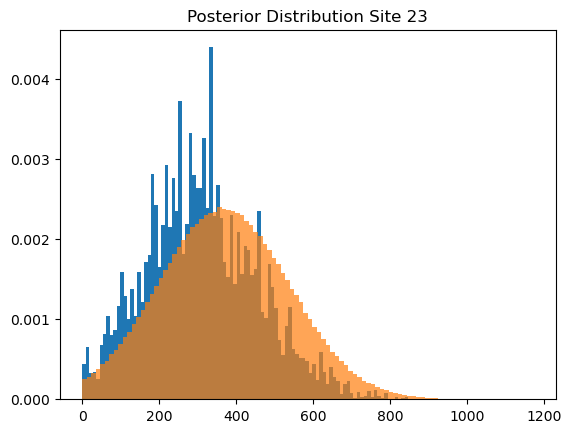

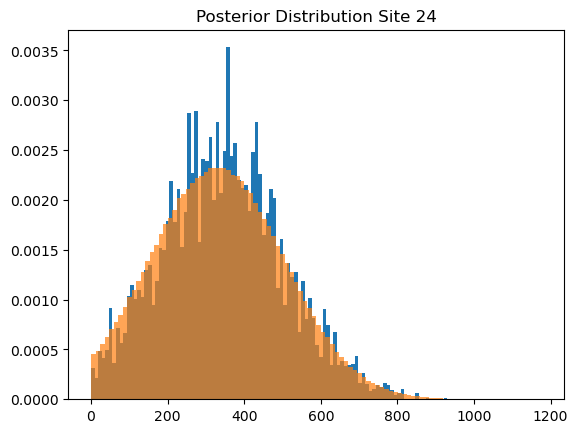

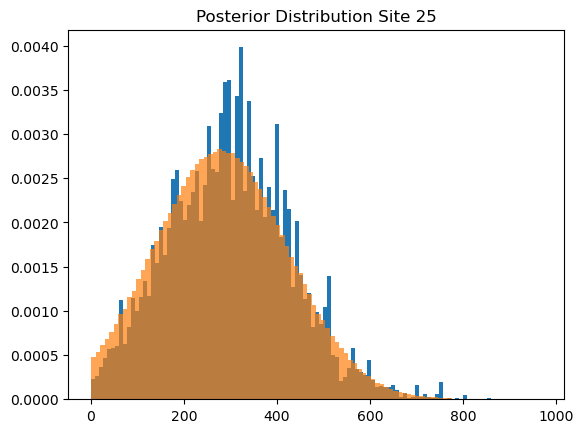

In [12]:
for i in range(25):
    plt.hist(Posterior[:,i], bins = 100, density=True)
    plt.hist(γ_list_mc[:,i], bins = 100, alpha=0.7, density=True)

    plt.title(f'Posterior Distribution Site {i+1}')
    plt.show()

In [9]:
np.mean(np.load('pe_20.76_xi_10_25sites.npy'),axis=0)

array([5.27984632e+02, 4.64470787e+02, 5.26539540e+02, 6.24391057e+02,
       6.95381661e+02, 6.29644848e+02, 5.05103738e+02, 5.04095182e+02,
       5.76731375e+02, 5.19830528e+02, 3.49400830e+02, 2.45925709e+02,
       8.97722382e+02, 6.38906355e+02, 5.34284527e+02, 6.44284566e+02,
       3.98111814e+02, 3.34536814e+02, 8.47766917e+02, 5.54237869e+02,
       4.94232259e+02, 3.53887118e+02, 3.81450126e+02, 3.35342332e+02,
       2.77423329e+02, 1.29893134e-01, 1.68481819e-01, 4.47827334e-01,
       1.13767822e+00, 1.72960849e+00, 1.47630865e-01, 2.21797516e-01,
       8.21486261e-01, 1.25406137e+00, 1.76982429e+00, 1.77622964e+00,
       1.40128859e+00, 1.46828954e+00, 1.31649519e+00, 1.62287647e+00,
       1.51144155e+00, 1.61090340e+00, 1.94439364e+00, 2.14770204e+00,
       2.17717749e+00, 2.92017270e+00, 2.40419028e+00, 2.04193967e+00,
       2.81728040e+00, 2.65842921e+00])